Classe prédite pour [4,4] : 0


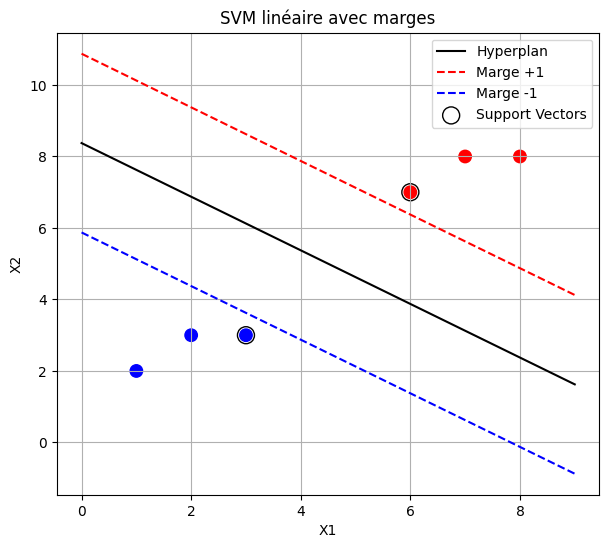

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# -------------------------------
# Données d'exemple (2 classes)
# -------------------------------
X = np.array([[1,2], [2,3], [3,3], [6,7], [7,8], [8,8]])
y = np.array([0, 0, 0, 1, 1, 1])

# -------------------------------
# Modèle SVM linéaire
# -------------------------------
model = SVC(kernel="linear", C=1.0)
model.fit(X, y)

# -------------------------------
# Prédiction
# -------------------------------
prediction = model.predict([[4, 4]])
print("Classe prédite pour [4,4] :", prediction[0])

# -------------------------------
# Fonction pour tracer l'hyperplan et les marges
# -------------------------------
def plot_svm(model, X, y):
    plt.figure(figsize=(7, 6))

    # Scatter plot des points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=80)

    # Récupération des paramètres
    w = model.coef_[0]      # vecteur normal à l'hyperplan
    b = model.intercept_[0] # biais

    # Ligne de séparation : w1*x + w2*y + b = 0
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx = np.linspace(x_min, x_max)

    # Hyperplan
    yy = -(w[0] * xx + b) / w[1]

    # Marges : w1*x + w2*y + b = ±1
    margin = 1 / np.linalg.norm(w)
    yy_plus = yy + margin
    yy_minus = yy - margin

    # Tracés
    plt.plot(xx, yy, 'k-', label="Hyperplan")
    plt.plot(xx, yy_plus, 'r--', label="Marge +1")
    plt.plot(xx, yy_minus, 'b--', label="Marge -1")

    # Support vectors
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='k',
                label="Support Vectors")

    plt.title("SVM linéaire avec marges")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Affichage du graphique
plot_svm(model, X, y)
